# ESERCIZIO 1

## PUNTO 1
Sia X una variabile aleatoria di Poisson, e sia λ il numero medio di eventi che accadono in un intervallo di ampiezza prefissata.

1) Quanti valori può assumere X?
  - Tutti i valori di N compreso lo zero
  - Funzione FMDP della VA poissoniana
  - E(X)= λ
  - Var(X)= λ

## PUNTO 2

Fissiamo  λ = 5 e definiamo:

1) il grafico di FMDP

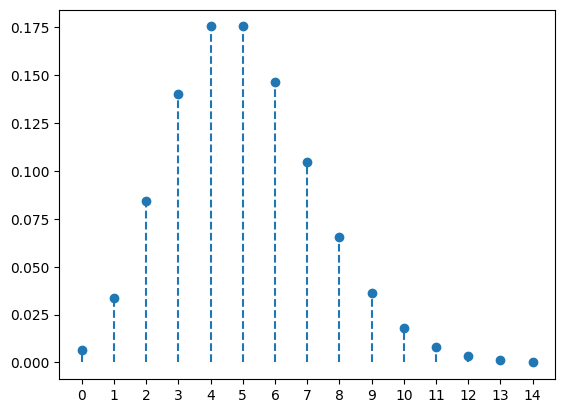

In [13]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

p = sp.poisson(5)
x = np.arange(0, 14+ 1, 1)
plt.xticks(x)
plt.vlines(x,0,p.pmf(x),linestyle='dashed')
plt.plot(x, p.pmf(x), 'o')
plt.show()

2) probabilita' che X sia maggiore di 6.

In [56]:
import math as m
def PFR(l,x):
    res=0.0
    for i in range (x+1):
        res+=((m.pow(l,i)*m.pow((m.e),(-1*l)))/(m.factorial(i)))
    return res

1-PFR(5,6)

0.23781653702706118

3. Trovare X minima tale che PFR(l,X) sia >= 0.8

In [57]:
l=5
x=0
while PFR(l,x)<0.8:
    x+=1
print(x)

7


## PUNTO 3

Avendo la Variabile Aleatoria X e avendo la variabile aleatoria Y = aX + B ho una trasformazione affine.
il valore atteso con le trasformazioni equivale al valore atteso trasformato coerentemente con la trasformazione.
la varianza equivale al valore di a^2 * Var(X). Quindi:

- E(X) = Lambda * A + B
- Var(X) = A^2*Lambda

# ESERCIZIO 2

Un'azienda è proprietaria di alcune sorgenti di alta montagna. L'azienda ha da poco acquistato un dispositivo per il filtraggio dell'acqua, che filtra 5 litri di acqua per volta e, per ogni operazione, registra su un file alcune informazioni tra cui il nome della sorgente dalla quale è stata prelevata l'acqua, la durezza dell'acqua analizzata, il numero di particelle riscontrate di alcuni elementi (per esempio magnesio, sodio, oro, argento, ferro, piombo, iodio). Dalle prime prove di utilizzo si è notato con sorpresa che, nel file prodotto dal dispositivo, la colonna corrispondente all'oro non contiene sempre il valore zero, quindi nell'acqua si possono trovare tracce di oro.

In [71]:
import pandas as pd
df = pd.read_csv('./ComposizioneAcqua.csv',sep=',')
df

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


### Domanda 1
Quanti casi sono presenti nel file?

In [66]:
len(df)

1650

### Domanda 2
Quanti litri sono stati analizzati?

In [73]:
len(df['Oro'])*5

8250

### Domanda 3
Quante sono le sorgenti dalle quali sono stati prelevati i campioni di acqua?

In [74]:
len(set(df['NomeSorgente']))

5

### Domanda 4
Le diverse sorgenti sono rappresentate in modo uniforme nel dataset?

In [130]:
import math
from scipy.stats import entropy

def gini(series):
    return 1-sum(series.value_counts(normalize=True).map(lambda f: math.pow(f,2)))

def my_entropy(series):
    return 0-sum(series.value_counts(normalize=True).map(lambda f: f*math.log(f,math.e)))

def normalized_entropy(series):
    leng=len(series.value_counts(normalize=True))
    return my_entropy(series)*1/leng

def normalized_gini(series):
    leng=len(series.value_counts(normalize=True))
    return Gini(series)*leng/(leng-1)
 
print("Normalized GINI: ",normalized_gini(df['NomeSorgente']))
print("Normalized ENTROPY: ",normalized_entropy(df['NomeSorgente']))

Normalized GINI:  0.980257116620753
Normalized ENTROPY:  0.3145005552445871
